<a href="https://colab.research.google.com/github/gill876/hacarus-test/blob/main/Hacarus_Test_Cargill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas is used for data manipulation
import pandas as pd
# Use numpy to convert to arrays
import numpy as np
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Import evaluation metrics
from sklearn.metrics import r2_score
#Import svm model
from sklearn import svm
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Read in data and display first 5 rows
features = pd.read_excel('Meal Analysis (2017) .xlsx')
features.head(5)

,Unnamed: 0,Type,gender,age,height,weight,EER[kcal],P target(15%)[g],F target(25%)[g],C target(60%)[g],number of dishes,E[kcal],P[g],F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best)
0,1,breakfast,female,32.0,157.0,48.0,1655,62.043750,45.958333,248.175000,2,333.87,5.85,0.75,75.69,0.21,29.0,2
1,2,breakfast,female,35.0,161.0,55.0,2073,77.745091,57.588956,310.980364,2,213.85,4.62,4.48,41.25,0.11,0.0,1
2,3,breakfast,female,26.0,159.0,51.0,2042,76.584375,56.729167,306.337500,4,351.59,27.31,18.85,18.10,2.84,116.4,2
3,4,breakfast,female,48.0,164.0,57.0,1772,66.431250,49.208333,265.725000,2,295.43,5.63,0.89,65.08,0.65,189.0,2
4,5,dinner,female,48.0,164.0,57.0,1772,66.431250,49.208333,265.725000,5,876.19,41.46,34.16,96.30,6.37,53.5,2


In [ ]:
features = features.drop('Unnamed: 0', axis=1)

In [ ]:
features.head(5)

,Type,gender,age,height,weight,EER[kcal],P target(15%)[g],F target(25%)[g],C target(60%)[g],number of dishes,E[kcal],P[g],F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best)
0,breakfast,female,32.0,157.0,48.0,1655,62.043750,45.958333,248.175000,2,333.87,5.85,0.75,75.69,0.21,29.0,2
1,breakfast,female,35.0,161.0,55.0,2073,77.745091,57.588956,310.980364,2,213.85,4.62,4.48,41.25,0.11,0.0,1
2,breakfast,female,26.0,159.0,51.0,2042,76.584375,56.729167,306.337500,4,351.59,27.31,18.85,18.10,2.84,116.4,2
3,breakfast,female,48.0,164.0,57.0,1772,66.431250,49.208333,265.725000,2,295.43,5.63,0.89,65.08,0.65,189.0,2
4,dinner,female,48.0,164.0,57.0,1772,66.431250,49.208333,265.725000,5,876.19,41.46,34.16,96.30,6.37,53.5,2


In [ ]:
print('The shape of our features is:', features.shape)

The shape of our features is: (1315, 17)


In [ ]:
# Descriptive statistics for each column
features.describe()

,age,height,weight,EER[kcal],P target(15%)[g],F target(25%)[g],C target(60%)[g],number of dishes,E[kcal],P[g],F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best)
count,1314.000000,1314.000000,1314.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000
mean,39.703196,166.562405,58.714612,2176.253992,81.604021,60.447423,326.416085,2.707224,594.993894,21.301460,23.551567,69.478464,3.002091,72.791148,1.965779
std,9.369062,6.498895,8.368238,313.538696,11.757694,8.709403,47.030777,1.613367,309.082985,12.804031,18.162848,36.229788,1.995371,80.957033,0.712713
min,22.000000,152.000000,45.000000,1545.000000,57.949864,42.925825,231.799455,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35.000000,160.000000,51.250000,2020.000000,75.731250,56.097222,302.925000,1.000000,371.690000,12.265000,9.945000,42.360000,1.490000,0.000000,2.000000
50%,39.000000,167.000000,58.000000,2105.000000,78.918750,58.458333,315.675000,2.000000,564.170000,20.150000,19.440000,67.750000,2.720000,47.000000,2.000000
75%,44.000000,173.000000,63.000000,2376.000000,89.114456,66.010708,356.457825,4.000000,780.430000,28.125000,33.085000,92.715000,4.200000,120.850000,2.000000
max,62.000000,179.000000,91.000000,3380.000000,126.750000,93.888889,507.000000,13.000000,2382.340000,94.010000,141.660000,239.760000,14.740000,621.500000,4.000000


In [ ]:
print('Are there any empty values? {}'.format(('Yes' if features.isnull().values.any() else 'No')))

Are there any empty values? Yes


In [ ]:
print('How many rows contain empty values? {}'.format(features.isnull().T.any().T.sum()))

How many rows contain empty values? 1


In [ ]:
print('Rows with empty values:')
nan_rows = features[features.isnull().T.any()]
print(nan_rows)

Rows with empty values:
  Type gender  age  height  weight  EER[kcal]  P target(15%)[g]  \
7  NaN    NaN  NaN     NaN     NaN       1772          66.43125   

   F target(25%)[g]  C target(60%)[g]  number of dishes  E[kcal]  P[g]   F[g]  \
7         49.208333           265.725                 3   238.44  6.14  10.92   

    C[g]  Salt[g]  Vegetables[g]  Score(1:worst 2:bad 3:good 4:best)  
7  31.11      1.6          299.0                                   3  


In [ ]:
# Get rows where E[kcal] = 0
filtered_ekcal = features[features['E[kcal]'] == 0]
print(filtered_ekcal)

        Type gender   age  height  weight  EER[kcal]  P target(15%)[g]  \
1306  dinner   male  39.0   170.0    60.0       1685          63.16875   

      F target(25%)[g]  C target(60%)[g]  number of dishes  E[kcal]  P[g]  \
1306         46.791667           252.675                 1      0.0   0.0   

      F[g]  C[g]  Salt[g]  Vegetables[g]  Score(1:worst 2:bad 3:good 4:best)  
1306   0.0   0.1      0.0            0.0                                   1  


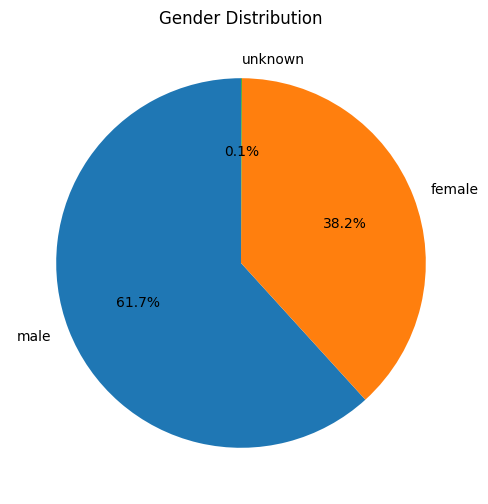

In [ ]:
# Fill NaN with 'Unknown'
features['gender'].fillna('unknown', inplace=True)
# Count the occurrences of each gender
gender_counts = features['gender'].value_counts()
# Plot
plt.figure(figsize=(8,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

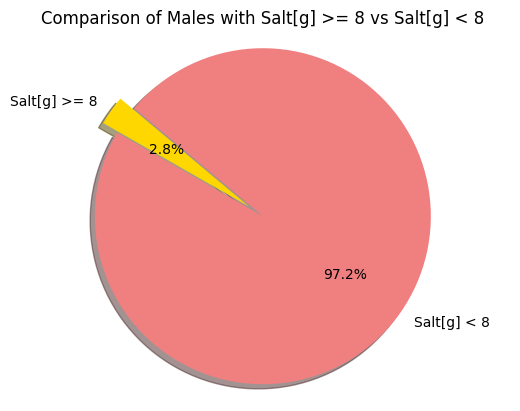

In [ ]:
# Filtering the dataframe for males only
male_data = features[features['gender'] == 'male']

# Counting males with Salt[g] >= 8 and Salt[g] < 8
gte_8 = len(male_data[male_data['Salt[g]'] >= 8])
lt_8 = len(male_data[male_data['Salt[g]'] < 8])

# Data to plot
labels = ['Salt[g] >= 8', 'Salt[g] < 8']
sizes = [gte_8, lt_8]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice for emphasis

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Comparison of Males with Salt[g] >= 8 vs Salt[g] < 8')
plt.show()

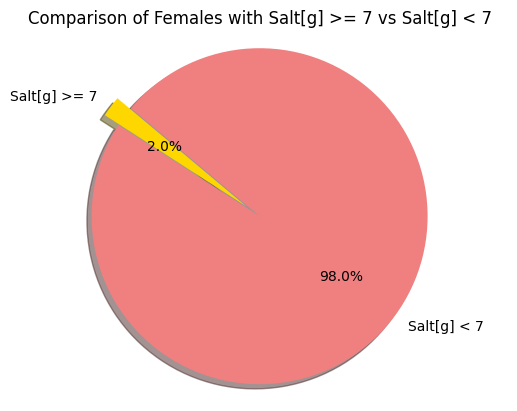

In [ ]:
# Filtering the dataframe for females only
female_data = features[features['gender'] == 'female']

# Counting females with Salt[g] >= 7 and Salt[g] < 7
gte_7 = len(female_data[female_data['Salt[g]'] >= 7])
lt_7 = len(female_data[female_data['Salt[g]'] < 7])

# Data to plot
labels = ['Salt[g] >= 7', 'Salt[g] < 7']
sizes = [gte_7, lt_7]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice for emphasis

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')g
plt.title('Comparison of Females with Salt[g] >= 7 vs Salt[g] < 7')
plt.show()

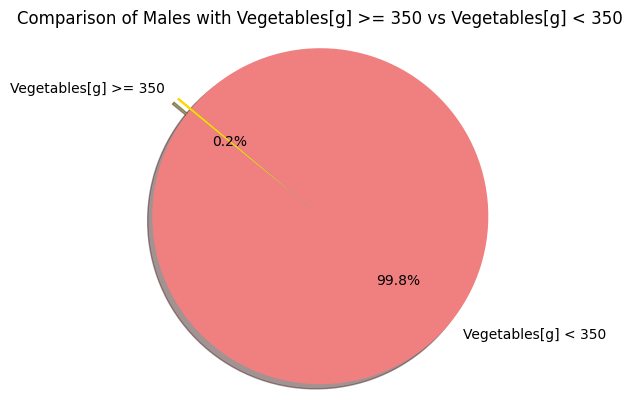

In [ ]:
# Filtering the dataframe for males only
male_data = features[features['gender'] == 'male']

# Counting males with Vegetables[g] >= 350 and Vegetables[g] < 350
gte_350 = len(male_data[male_data['Vegetables[g]'] >= 350])
lt_350 = len(male_data[male_data['Vegetables[g]'] < 350])

# Data to plot
labels = ['Vegetables[g] >= 350', 'Vegetables[g] < 350']
sizes = [gte_350, lt_350]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice for emphasis

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Comparison of Males with Vegetables[g] >= 350 vs Vegetables[g] < 350')
plt.show()

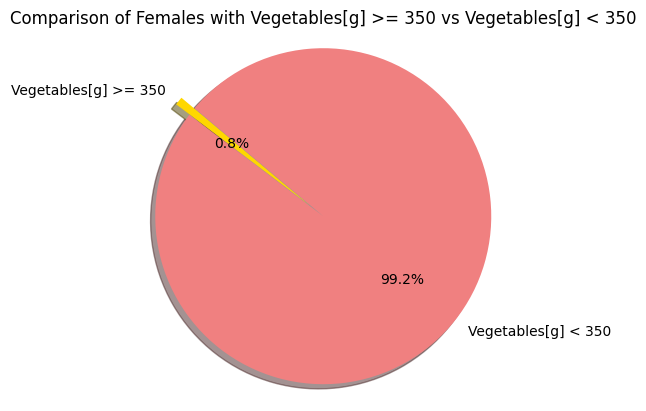

In [ ]:
# Filtering the dataframe for females only
female_data = features[features['gender'] == 'female']

# Counting females with Vegetables[g] >= 350 and Vegetables[g] < 350
gte_350 = len(female_data[female_data['Vegetables[g]'] >= 350])
lt_350 = len(female_data[female_data['Vegetables[g]'] < 350])

# Data to plot
labels = ['Vegetables[g] >= 350', 'Vegetables[g] < 350']
sizes = [gte_350, lt_350]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice for emphasis

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Comparison of Females with Vegetables[g] >= 350 vs Vegetables[g] < 350')
plt.show()

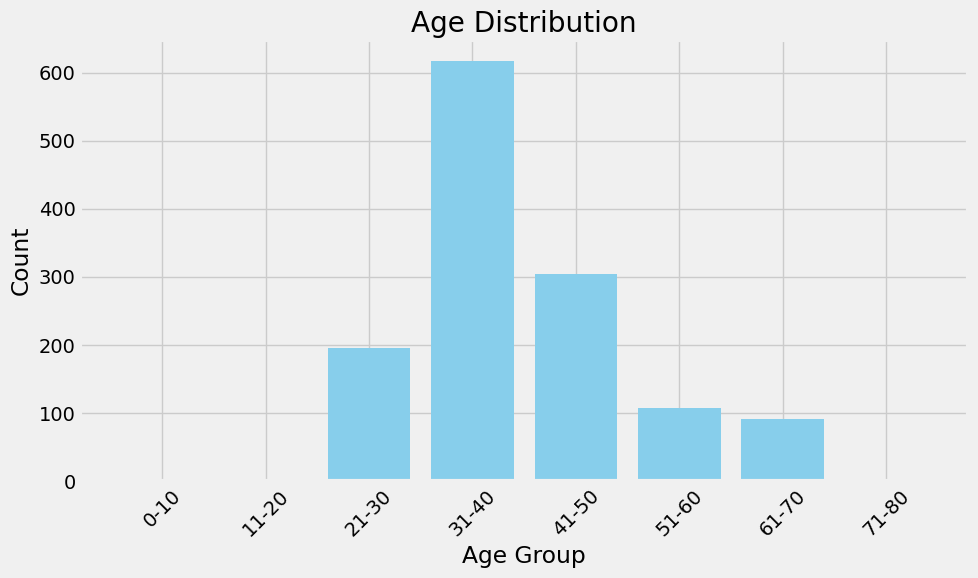

In [ ]:
# Define age bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Replace NaN values in column with the average of the column
features['age'].fillna(features['age'].mean(), inplace=True)

# Create a new column in the dataframe to hold the binned values
features['age group'] = pd.cut(features['age'], bins=bins, labels=labels, right=False)

# Create a new dataframe with binned value counts
age_group_df = features['age group'].value_counts().sort_index().reset_index()
age_group_df.columns = ['Age Group', 'Count']

# Plot
plt.figure(figsize=(10,6))
plt.bar(age_group_df['Age Group'], age_group_df['Count'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

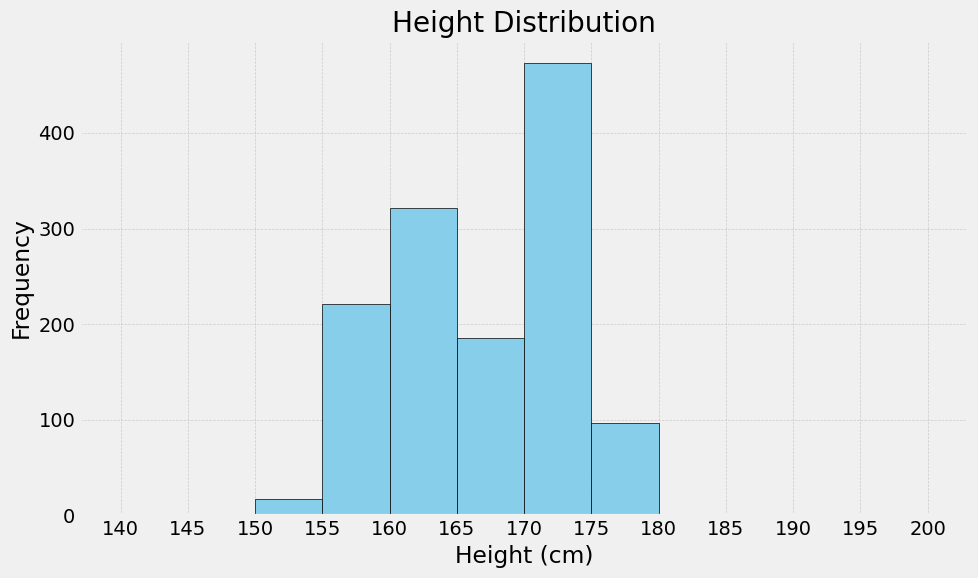

In [ ]:
# Replace NaN values in column with the average of the column
features['height'].fillna(features['height'].mean(), inplace=True)

# Plotting the histogram
plt.figure(figsize=(10,6))
plt.hist(features['height'], bins=range(140, 201, 5), edgecolor='k', color='skyblue')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Height Distribution')
plt.xticks(range(140, 201, 5))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

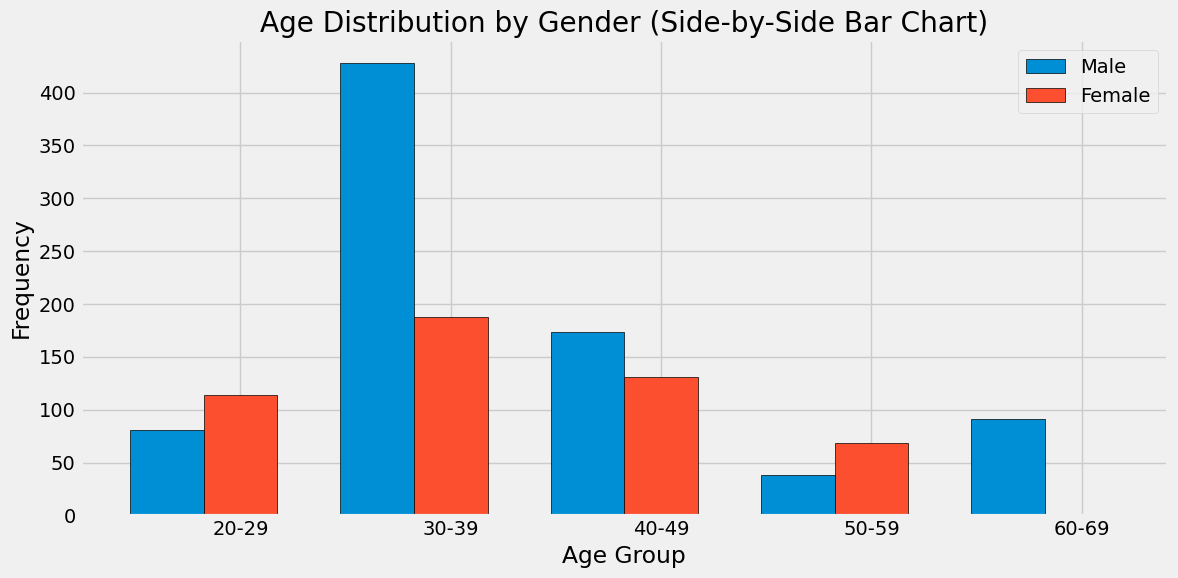

In [ ]:
bins = range(10, 101, 10)
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
features['age group'] = pd.cut(features['age'], bins=bins, labels=labels, right=False)

# Create a crosstab of age group and gender
ct = pd.crosstab(features['age group'], features['gender']).reset_index()

plt.figure(figsize=(12,6))
bar_width = 0.35
r1 = np.arange(len(ct))
r2 = [x + bar_width for x in r1]

plt.bar(r1, ct['male'], width=bar_width, label='Male', edgecolor='k')
plt.bar(r2, ct['female'], width=bar_width, label='Female', edgecolor='k')

plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Age Distribution by Gender (Side-by-Side Bar Chart)')
plt.xticks([r + bar_width for r in range(len(ct))], ct['age group'])
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

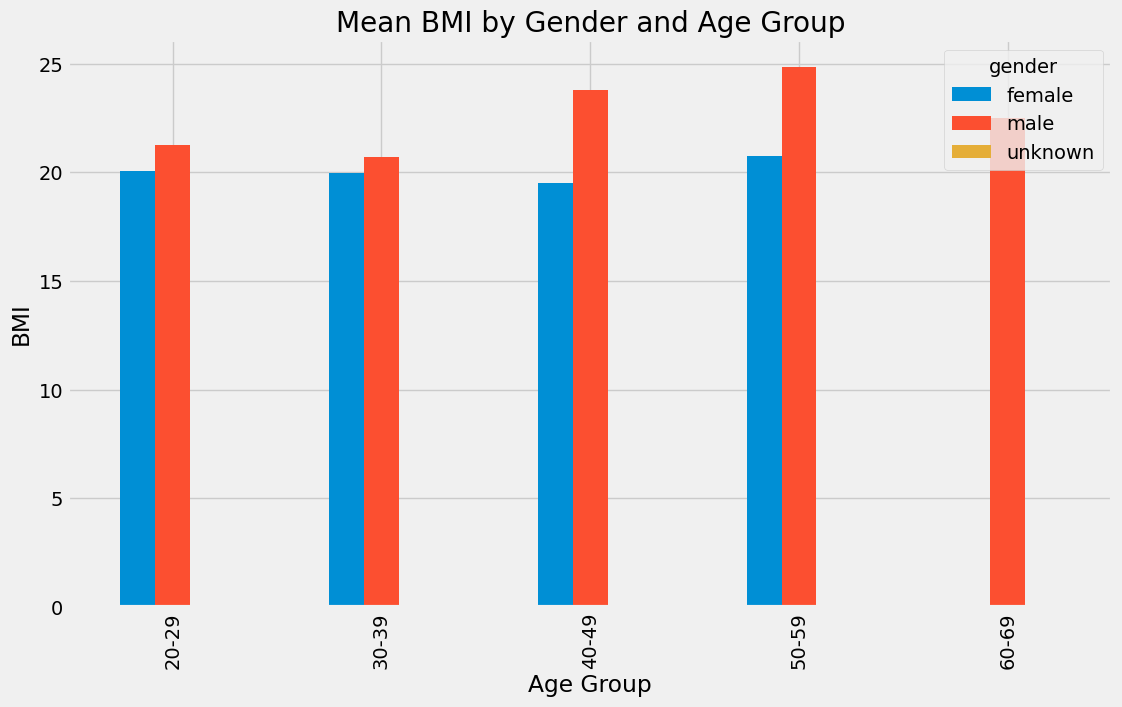

In [ ]:
# Compute BMI
bmi = features['weight'] / (features['height']/100)**2

# Define age bins
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['<18', '18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '>90']

# Group by gender and age bins and compute mean BMI
grouped = features.groupby(['gender', 'age group']).apply(lambda x: np.mean(bmi[x.index])).unstack()

# Plot
grouped.T.plot(kind='bar', figsize=(12, 7))
plt.title('Mean BMI by Gender and Age Group')
plt.ylabel('BMI')
plt.xlabel('Age Group')
plt.show()

In [ ]:
print('The shape of our features is:', features.shape)
# Descriptive statistics for each column
features.describe()

The shape of our features is: (1315, 18)


,age,height,weight,EER[kcal],P target(15%)[g],F target(25%)[g],C target(60%)[g],number of dishes,E[kcal],P[g],F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best)
count,1315.000000,1315.000000,1314.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000
mean,39.703196,166.562405,58.714612,2176.253992,81.604021,60.447423,326.416085,2.707224,594.993894,21.301460,23.551567,69.478464,3.002091,72.791148,1.965779
std,9.365496,6.496421,8.368238,313.538696,11.757694,8.709403,47.030777,1.613367,309.082985,12.804031,18.162848,36.229788,1.995371,80.957033,0.712713
min,22.000000,152.000000,45.000000,1545.000000,57.949864,42.925825,231.799455,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35.000000,160.000000,51.250000,2020.000000,75.731250,56.097222,302.925000,1.000000,371.690000,12.265000,9.945000,42.360000,1.490000,0.000000,2.000000
50%,39.000000,167.000000,58.000000,2105.000000,78.918750,58.458333,315.675000,2.000000,564.170000,20.150000,19.440000,67.750000,2.720000,47.000000,2.000000
75%,44.000000,173.000000,63.000000,2376.000000,89.114456,66.010708,356.457825,4.000000,780.430000,28.125000,33.085000,92.715000,4.200000,120.850000,2.000000
max,62.000000,179.000000,91.000000,3380.000000,126.750000,93.888889,507.000000,13.000000,2382.340000,94.010000,141.660000,239.760000,14.740000,621.500000,4.000000


In [ ]:
features.head(5)

,Type,gender,age,height,weight,EER[kcal],P target(15%)[g],F target(25%)[g],C target(60%)[g],number of dishes,E[kcal],P[g],F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best),age group
0,breakfast,female,32.0,157.0,48.0,1655,62.043750,45.958333,248.175000,2,333.87,5.85,0.75,75.69,0.21,29.0,2,30-39
1,breakfast,female,35.0,161.0,55.0,2073,77.745091,57.588956,310.980364,2,213.85,4.62,4.48,41.25,0.11,0.0,1,30-39
2,breakfast,female,26.0,159.0,51.0,2042,76.584375,56.729167,306.337500,4,351.59,27.31,18.85,18.10,2.84,116.4,2,20-29
3,breakfast,female,48.0,164.0,57.0,1772,66.431250,49.208333,265.725000,2,295.43,5.63,0.89,65.08,0.65,189.0,2,40-49
4,dinner,female,48.0,164.0,57.0,1772,66.431250,49.208333,265.725000,5,876.19,41.46,34.16,96.30,6.37,53.5,2,40-49


In [ ]:
features = features.drop('age group', axis=1)
features.shape

(1315, 17)

In [ ]:
print('Are there any empty values? {}'.format(('Yes' if features.isnull().values.any() else 'No')))
print('How many rows contain empty values? {}'.format(features.isnull().T.any().T.sum()))
print('Rows with empty values:')
nan_rows = features[features.isnull().T.any()]
print(nan_rows)

Are there any empty values? Yes
How many rows contain empty values? 1
Rows with empty values:
  Type   gender        age      height  weight  EER[kcal]  P target(15%)[g]  \
7  NaN  unknown  39.703196  166.562405     NaN       1772          66.43125   

   F target(25%)[g]  C target(60%)[g]  number of dishes  E[kcal]  P[g]   F[g]  \
7         49.208333           265.725                 3   238.44  6.14  10.92   

    C[g]  Salt[g]  Vegetables[g]  Score(1:worst 2:bad 3:good 4:best)  
7  31.11      1.6          299.0                                   3  


In [ ]:
# Drop rows that has NaN values on selected columns
features=features.dropna(subset=['Type'])
# Reset index after drop
features=features.dropna().reset_index(drop=True)

In [ ]:
pp_features = features.copy()

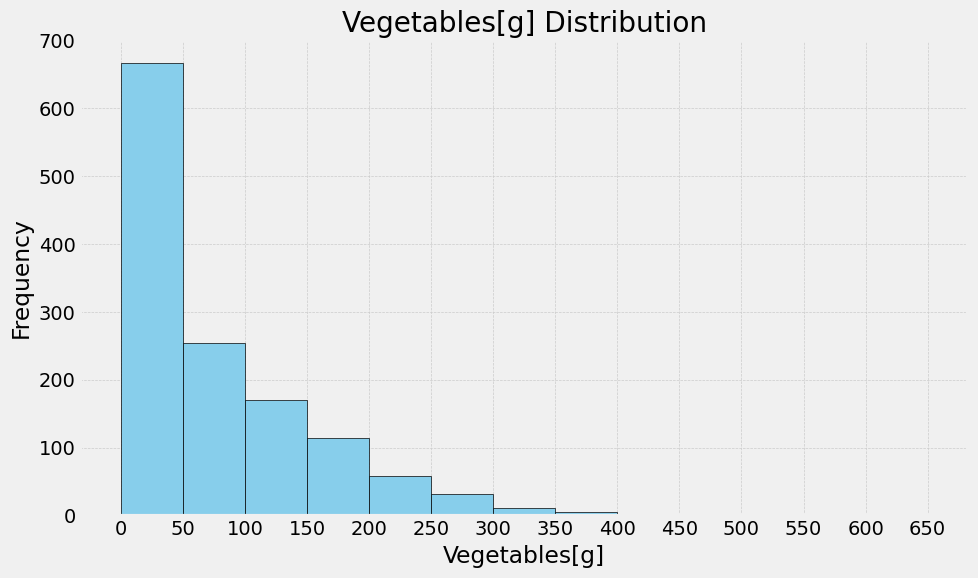

In [ ]:
# Vegetables[g] distribution
plt.figure(figsize=(10,6))
plt.hist(features['Vegetables[g]'], bins=range(0, 700, 50), edgecolor='k', color='skyblue')
plt.xlabel('Vegetables[g]')
plt.ylabel('Frequency')
plt.title('Vegetables[g] Distribution')
plt.xticks(range(0, 700, 50))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


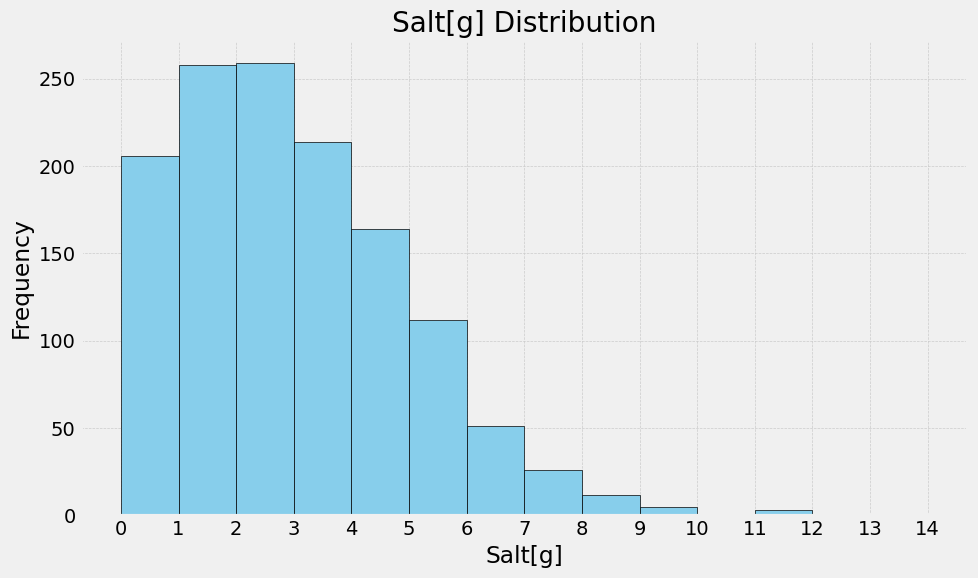

In [ ]:
# Salt[g] distribution
plt.figure(figsize=(10,6))
plt.hist(features['Salt[g]'], bins=range(0, 15, 1), edgecolor='k', color='skyblue')
plt.xlabel('Salt[g]')
plt.ylabel('Frequency')
plt.title('Salt[g] Distribution')
plt.xticks(range(0, 15, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

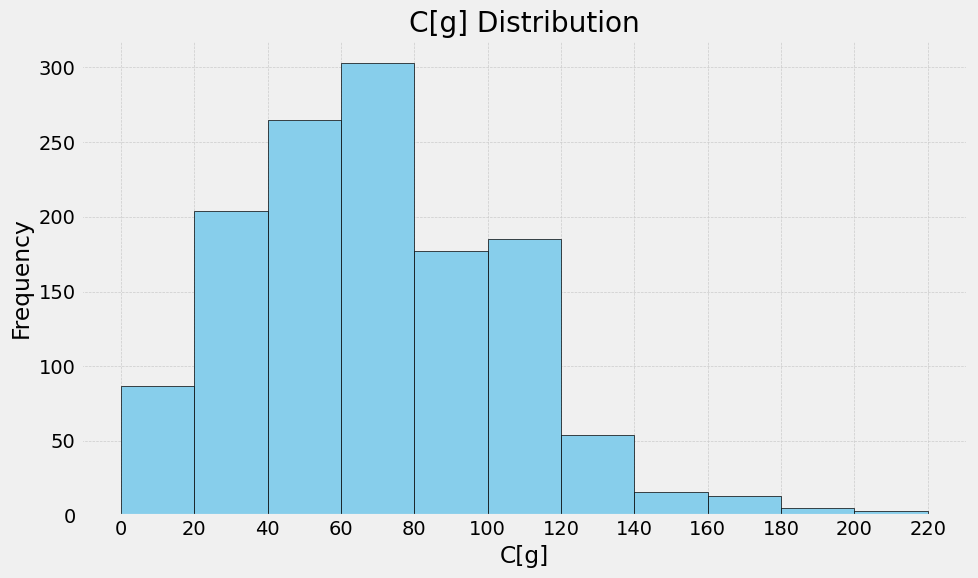

In [ ]:
# C[g] distribution
plt.figure(figsize=(10,6))
plt.hist(features['C[g]'], bins=range(0, 240, 20), edgecolor='k', color='skyblue')
plt.xlabel('C[g]')
plt.ylabel('Frequency')
plt.title('C[g] Distribution')
plt.xticks(range(0, 240, 20))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

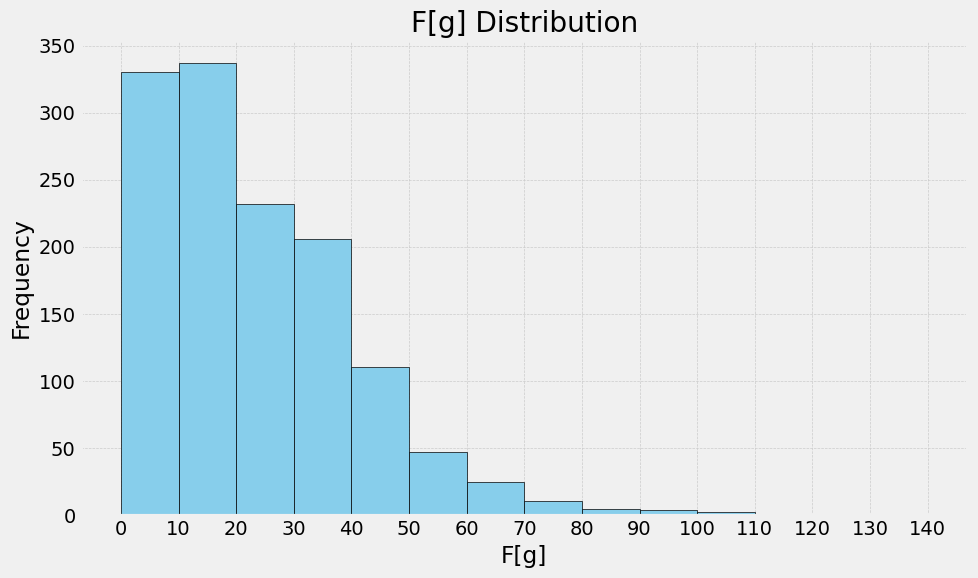

In [ ]:
# F[g] distribution
plt.figure(figsize=(10,6))
plt.hist(features['F[g]'], bins=range(0, 150, 10), edgecolor='k', color='skyblue')
plt.xlabel('F[g]')
plt.ylabel('Frequency')
plt.title('F[g] Distribution')
plt.xticks(range(0, 150, 10))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

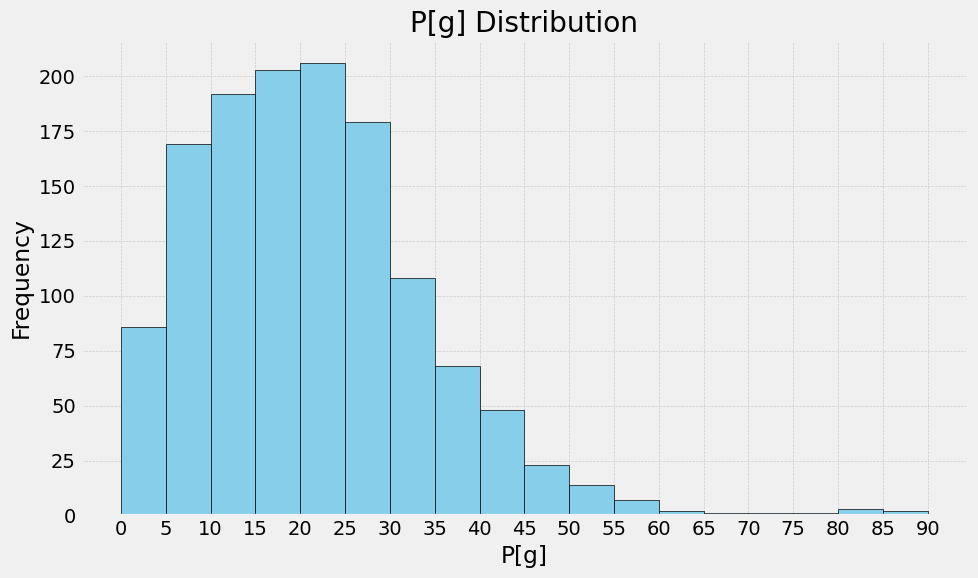

In [ ]:
# P[g] distribution
plt.figure(figsize=(10,6))
plt.hist(features['P[g]'], bins=range(0, 95, 5), edgecolor='k', color='skyblue')
plt.xlabel('P[g]')
plt.ylabel('Frequency')
plt.title('P[g] Distribution')
plt.xticks(range(0, 95, 5))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

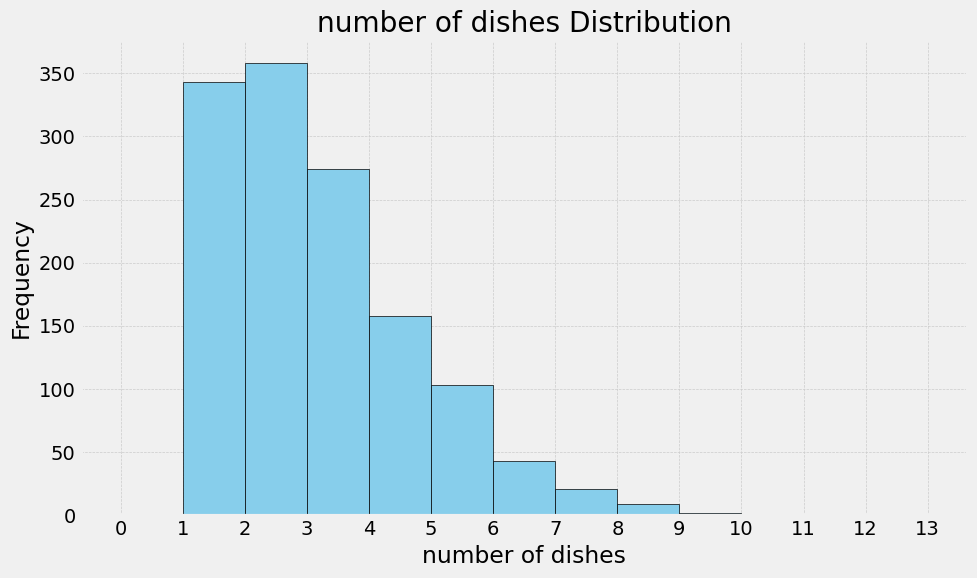

In [ ]:
# number of dishes distribution
plt.figure(figsize=(10,6))
plt.hist(features['number of dishes'], bins=range(0, 14, 1), edgecolor='k', color='skyblue')
plt.xlabel('number of dishes')
plt.ylabel('Frequency')
plt.title('number of dishes Distribution')
plt.xticks(range(0, 14, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

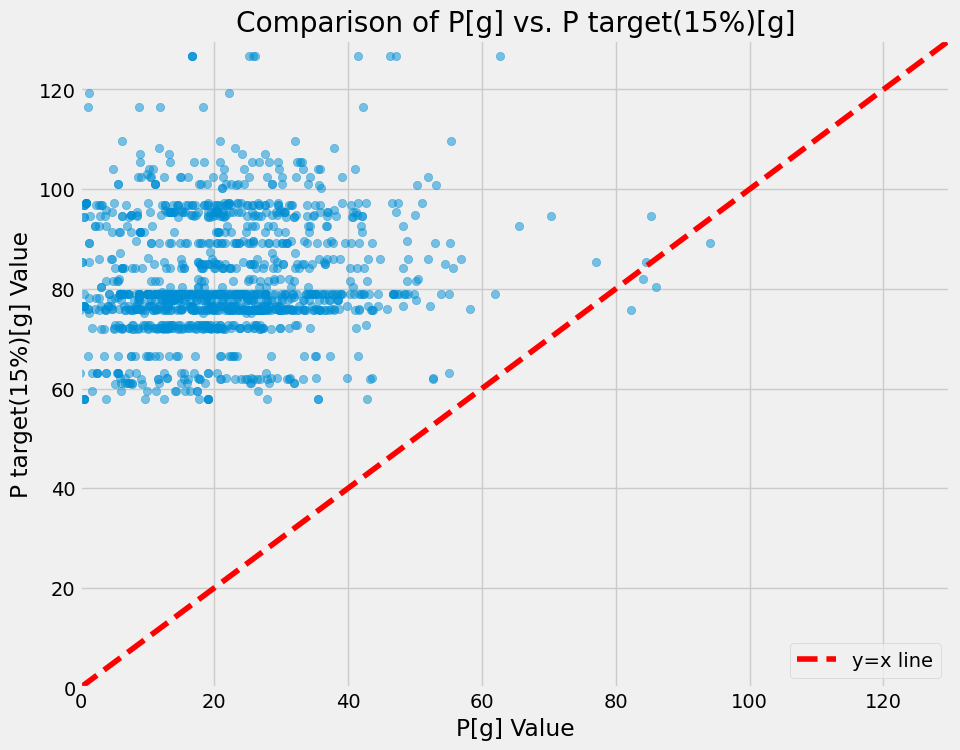

In [ ]:
plt.figure(figsize=(10, 8))

# Scatter plot
plt.scatter(features['P[g]'], features['P target(15%)[g]'], alpha=0.5)

# 45-degree line
max_val = 130
plt.plot([0, max_val], [0, max_val], 'r', linestyle='--', label='y=x line')

plt.title("Comparison of P[g] vs. P target(15%)[g]")
plt.xlabel("P[g] Value")
plt.ylabel("P target(15%)[g] Value")
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.legend()
plt.grid(True)

plt.show()

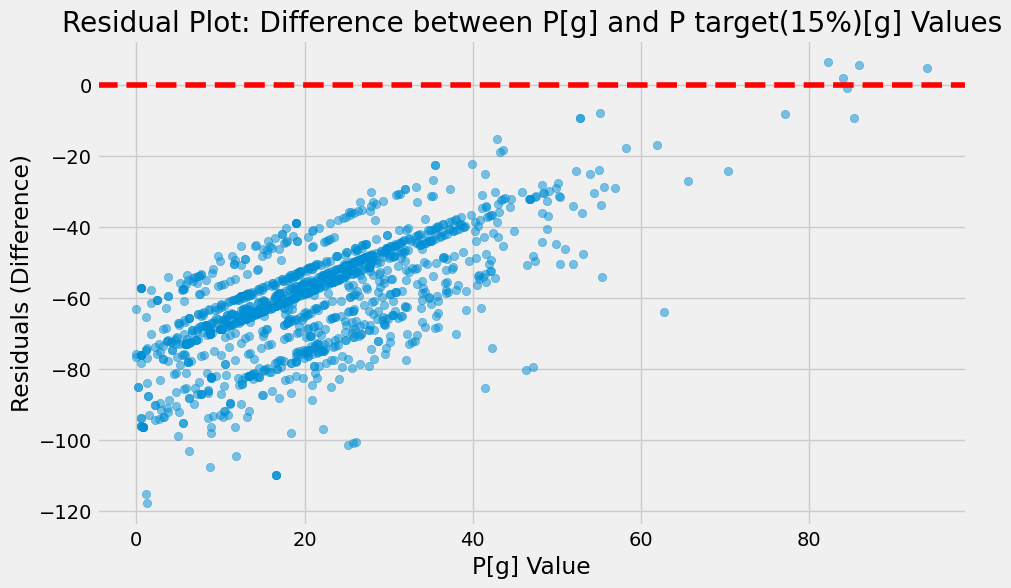

In [ ]:
residuals = features['P[g]'] - features['P target(15%)[g]']

plt.figure(figsize=(10, 6))
plt.scatter(features['P[g]'], residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Zero line
plt.title("Residual Plot: Difference between P[g] and P target(15%)[g] Values")
plt.xlabel("P[g] Value")
plt.ylabel("Residuals (Difference)")
plt.grid(True)
plt.show()

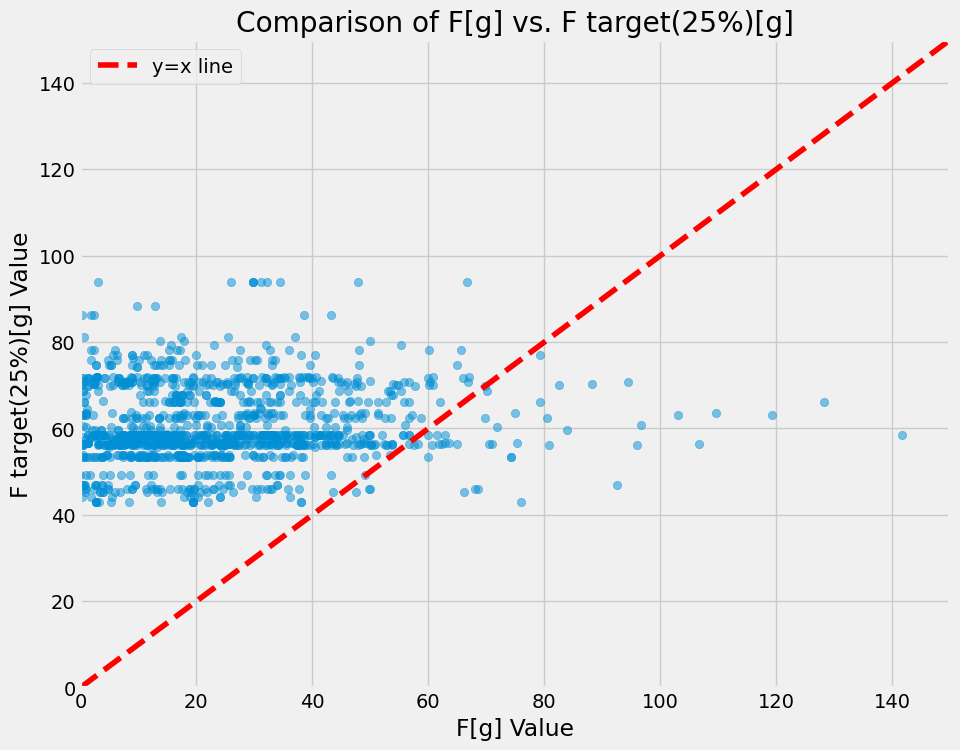

In [ ]:
plt.figure(figsize=(10, 8))

# Scatter plot
plt.scatter(features['F[g]'], features['F target(25%)[g]'], alpha=0.5)

# 45-degree line
max_val = 150
plt.plot([0, max_val], [0, max_val], 'r', linestyle='--', label='y=x line')

plt.title("Comparison of F[g] vs. F target(25%)[g]")
plt.xlabel("F[g] Value")
plt.ylabel("F target(25%)[g] Value")
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.legend()
plt.grid(True)

plt.show()

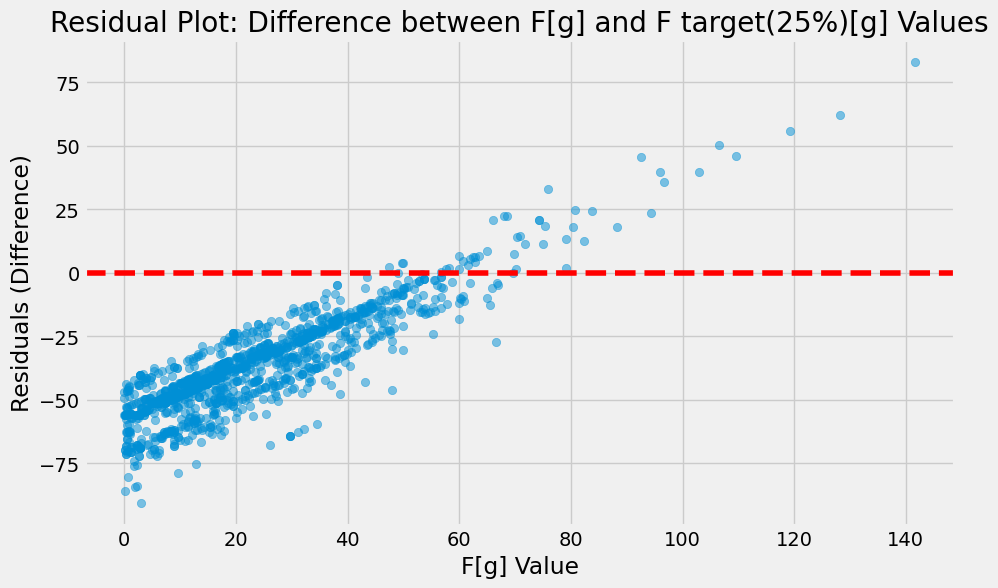

In [ ]:
residuals = features['F[g]'] - features['F target(25%)[g]']

plt.figure(figsize=(10, 6))
plt.scatter(features['F[g]'], residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Zero line
plt.title("Residual Plot: Difference between F[g] and F target(25%)[g] Values")
plt.xlabel("F[g] Value")
plt.ylabel("Residuals (Difference)")
plt.grid(True)
plt.show()

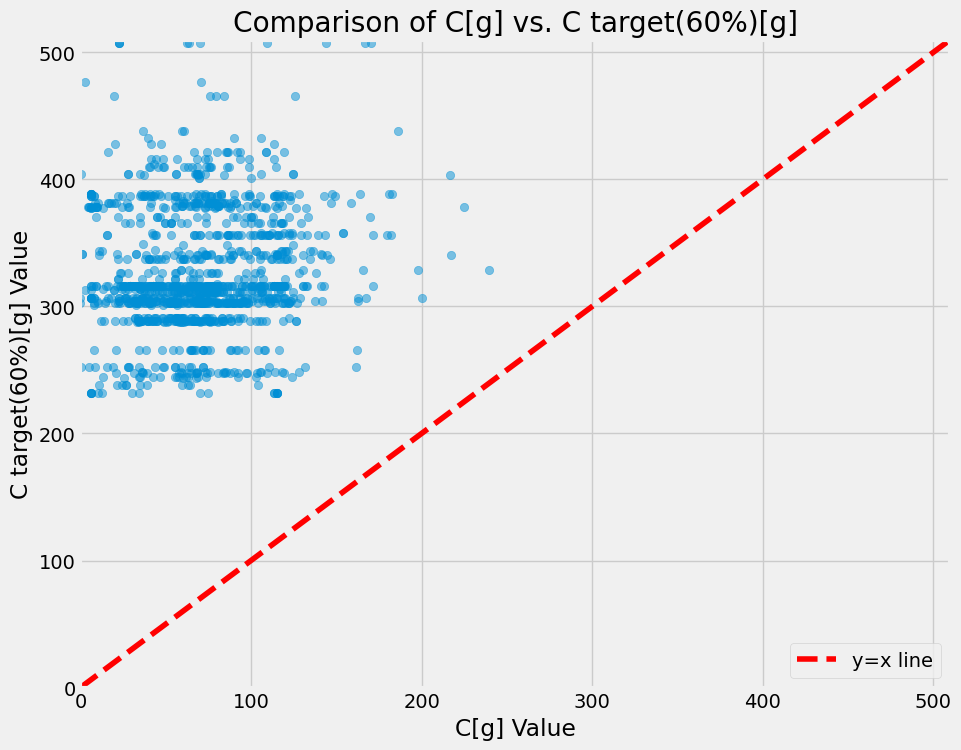

In [ ]:
plt.figure(figsize=(10, 8))

# Scatter plot
plt.scatter(features['C[g]'], features['C target(60%)[g]'], alpha=0.5)

# 45-degree line
max_val = 510
plt.plot([0, max_val], [0, max_val], 'r', linestyle='--', label='y=x line')

plt.title("Comparison of C[g] vs. C target(60%)[g]")
plt.xlabel("C[g] Value")
plt.ylabel("C target(60%)[g] Value")
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.legend()
plt.grid(True)

plt.show()

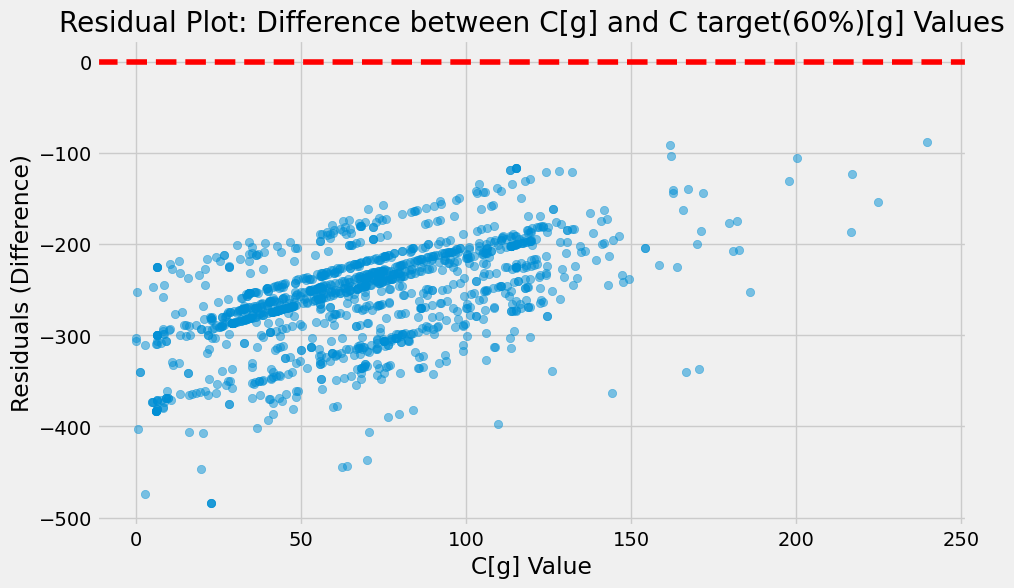

In [ ]:
residuals = features['C[g]'] - features['C target(60%)[g]']

plt.figure(figsize=(10, 6))
plt.scatter(features['C[g]'], residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Zero line
plt.title("Residual Plot: Difference between C[g] and C target(60%)[g] Values")
plt.xlabel("C[g] Value")
plt.ylabel("Residuals (Difference)")
plt.grid(True)
plt.show()

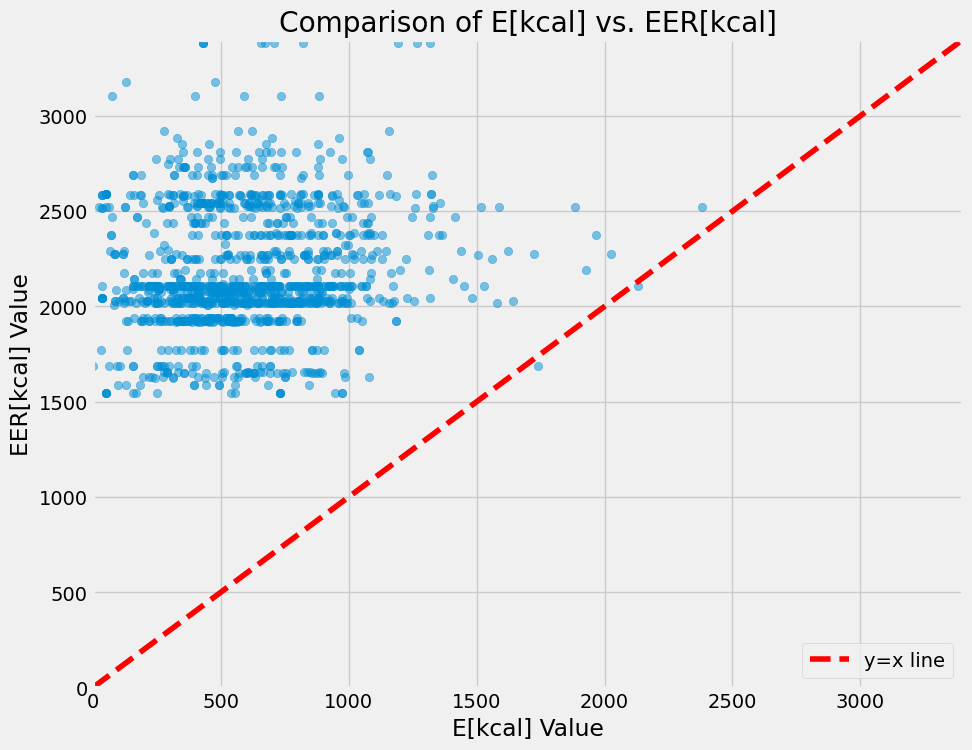

In [ ]:
plt.figure(figsize=(10, 8))
# Scatter plot
plt.scatter(features['E[kcal]'], features['EER[kcal]'], alpha=0.5)

# 45-degree line
max_val = 3400
plt.plot([0, max_val], [0, max_val], 'r', linestyle='--', label='y=x line')

plt.title("Comparison of E[kcal] vs. EER[kcal]")
plt.xlabel("E[kcal] Value")
plt.ylabel("EER[kcal] Value")
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.legend()
plt.grid(True)

plt.show()

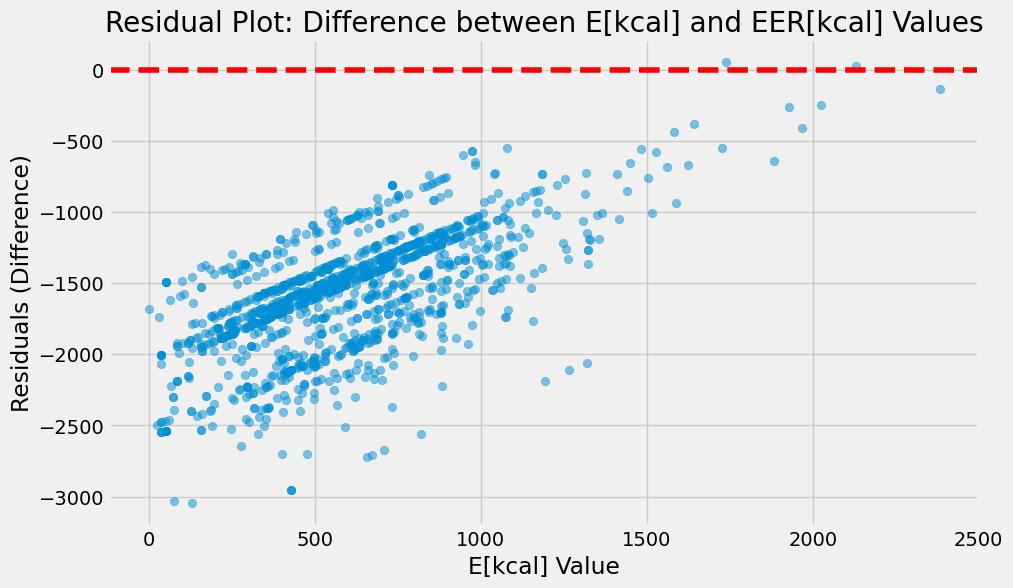

In [ ]:
residuals = features['E[kcal]'] - features['EER[kcal]']

plt.figure(figsize=(10, 6))
plt.scatter(features['E[kcal]'], residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Zero line
plt.title("Residual Plot: Difference between E[kcal] and EER[kcal] Values")
plt.xlabel("E[kcal] Value")
plt.ylabel("Residuals (Difference)")
plt.grid(True)
plt.show()

In [ ]:
gender_view = features.sort_values(by='gender', ascending=True)['gender'].drop_duplicates()
print(gender_view)

0       female
1002      male
Name: gender, dtype: object


In [ ]:
type_view = features.sort_values(by='Type', ascending=True)['Type'].drop_duplicates()
print(type_view)

0       breakfast
147        dinner
1194        lunch
Name: Type, dtype: object


In [ ]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)

In [ ]:
# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,F target(25%)[g],C target(60%)[g],number of dishes,E[kcal],P[g],F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best),Type_breakfast,Type_dinner,Type_lunch,gender_female,gender_male
0,45.958333,248.175000,2,333.87,5.85,0.75,75.69,0.21,29.0,2,1,0,0,1,0
1,57.588956,310.980364,2,213.85,4.62,4.48,41.25,0.11,0.0,1,1,0,0,1,0
2,56.729167,306.337500,4,351.59,27.31,18.85,18.10,2.84,116.4,2,1,0,0,1,0
3,49.208333,265.725000,2,295.43,5.63,0.89,65.08,0.65,189.0,2,1,0,0,1,0
4,49.208333,265.725000,5,876.19,41.46,34.16,96.30,6.37,53.5,2,0,1,0,1,0


In [ ]:
features.rename(columns={'Score(1:worst 2:bad 3:good 4:best)': 'score'}, inplace=True)

In [ ]:
# Labels are the values we want to predict
labels = np.array(features['score'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('score', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (985, 19)
Training Labels Shape: (985,)
Testing Features Shape: (329, 19)
Testing Labels Shape: (329,)


In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.24 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.55 %.


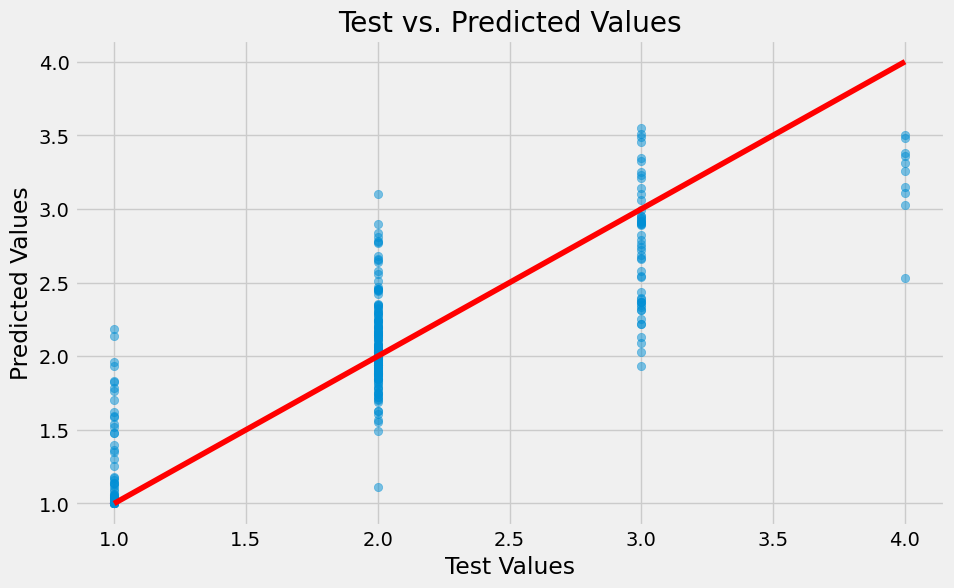

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test_labels, predictions, alpha=0.5)
plt.xlabel("Test Values")
plt.ylabel("Predicted Values")
plt.title("Test vs. Predicted Values")

# Plotting the diagonal line
min_val = min(min(test_labels), min(predictions))
max_val = max(max(test_labels), max(predictions))
plt.plot([min_val, max_val], [min_val, max_val], 'r')

plt.show()

In [ ]:
# Calculate R-squared on test data
r2 = r2_score(test_labels, predictions)
print("R-squared: {}".format(round(r2, 2)))

R-squared: 0.73


In [ ]:
# Round off predictions to try to improve accuracy
rounded_predictions = np.round(predictions).astype(int)
errors = abs(rounded_predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.18 degrees.
Accuracy: 90.63 %.


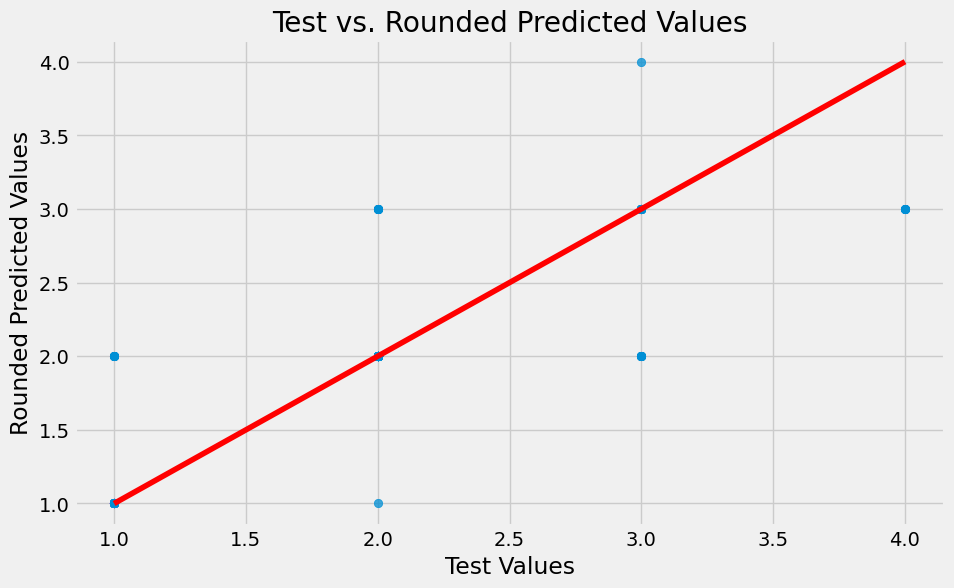

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test_labels, rounded_predictions, alpha=0.5)
plt.xlabel("Test Values")
plt.ylabel("Rounded Predicted Values")
plt.title("Test vs. Rounded Predicted Values")

# Plotting the diagonal line
min_val = min(min(test_labels), min(rounded_predictions))
max_val = max(max(test_labels), max(rounded_predictions))
plt.plot([min_val, max_val], [min_val, max_val], 'r')

plt.show()

In [ ]:
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Vegetables[g]        Importance: 0.26
Variable: E[kcal]              Importance: 0.22
Variable: P[g]                 Importance: 0.18
Variable: F[g]                 Importance: 0.09
Variable: C[g]                 Importance: 0.09
Variable: Salt[g]              Importance: 0.05
Variable: number of dishes     Importance: 0.03
Variable: age                  Importance: 0.02
Variable: height               Importance: 0.01
Variable: weight               Importance: 0.01
Variable: EER[kcal]            Importance: 0.01
Variable: P target(15%)[g]     Importance: 0.01
Variable: F target(25%)[g]     Importance: 0.01
Variable: C target(60%)[g]     Importance: 0.01
Variable: Type_breakfast       Importance: 0.0
Variable: Type_dinner          Importance: 0.0
Variable: Type_lunch           Importance: 0.0
Variable: gender_female        Importance: 0.0
Variable: gender_male          Importance: 0.0


In [ ]:
# New random forest with only the three most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [
    feature_list.index('Vegetables[g]'), feature_list.index('E[kcal]'), feature_list.index('P[g]'),
    feature_list.index('F[g]'), feature_list.index('C[g]'), feature_list.index('Salt[g]')
    ]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.24 degrees.
Accuracy: 87.27 %.


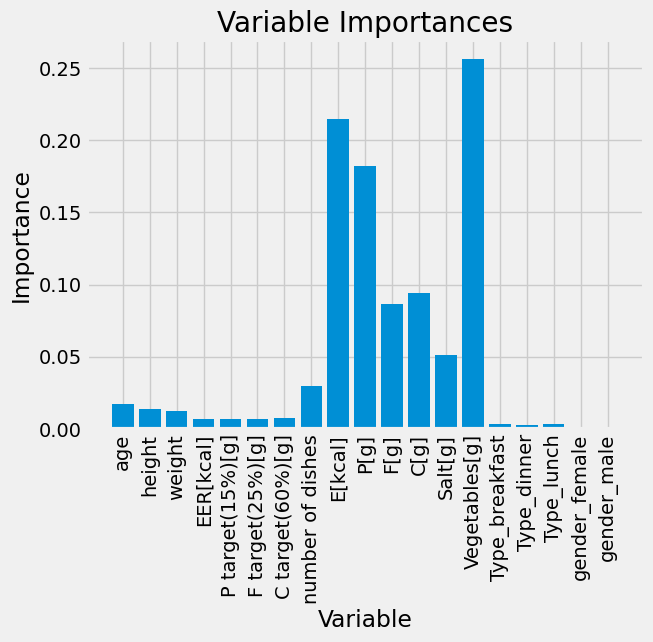

In [ ]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
# model = RandomForestRegressor()

# param_grid = {
#     'n_estimators': [10, 50, 100, 200],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30, 40],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
#                            cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# grid_search.fit(train_features, train_labels)

# best_params = grid_search.best_params_
# print(best_params)

In [ ]:
rf = RandomForestRegressor(
    bootstrap=True, max_depth=None, max_features='sqrt',
    min_samples_leaf=2, min_samples_split=5, n_estimators=50,
    random_state = 42
    )
# Train the model on training data
rf.fit(train_features, train_labels);
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.25 degrees.
Accuracy: 86.17 %.


In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')

In [ ]:
#Train the model using the training sets
clf.fit(train_features, train_labels)

#Predict the response for test dataset
y_pred = clf.predict(test_features)

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.7325227963525835


In [ ]:
# Linear Regression with most important variables
important_indices = [
    feature_list.index('Vegetables[g]'), feature_list.index('E[kcal]'),
    feature_list.index('P[g]'), feature_list.index('F[g]'),
    feature_list.index('C[g]')#, feature_list.index('Salt[g]')
    ]

train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

model = LinearRegression()
model.fit(train_important, train_labels)
y_pred = model.predict(test_important)

errors = abs(y_pred - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.43 degrees.
Accuracy: 75.38 %.


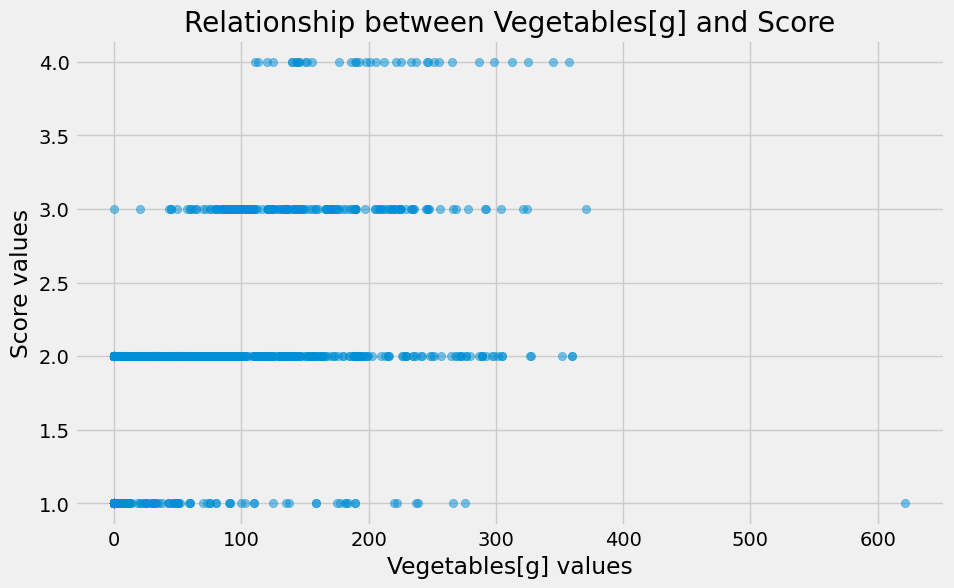

In [ ]:
# Scatter plot with Score and 'Vegetables[g]'
plt.figure(figsize=(10, 6))  # Set the figure size for clarity
plt.scatter(pp_features['Vegetables[g]'], pp_features['Score(1:worst 2:bad 3:good 4:best)'], alpha=0.5)
plt.title('Relationship between Vegetables[g] and Score')
plt.xlabel('Vegetables[g] values')
plt.ylabel('Score values')
plt.grid(True)
plt.show()

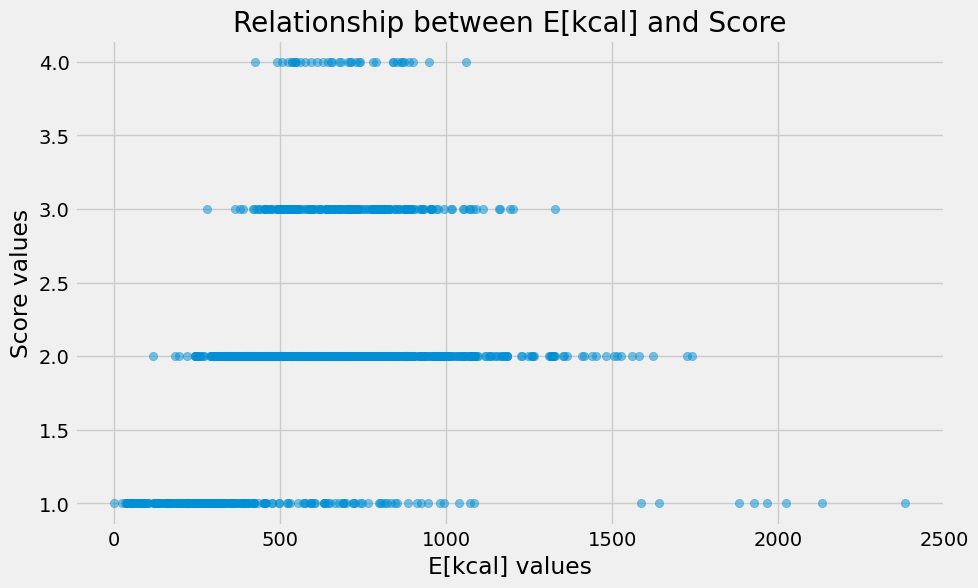

In [ ]:
# Scatter plot with Score and 'E[kcal]'
plt.figure(figsize=(10, 6))  # Set the figure size for clarity
plt.scatter(pp_features['E[kcal]'], pp_features['Score(1:worst 2:bad 3:good 4:best)'], alpha=0.5)
plt.title('Relationship between E[kcal] and Score')
plt.xlabel('E[kcal] values')
plt.ylabel('Score values')
plt.grid(True)
plt.show()

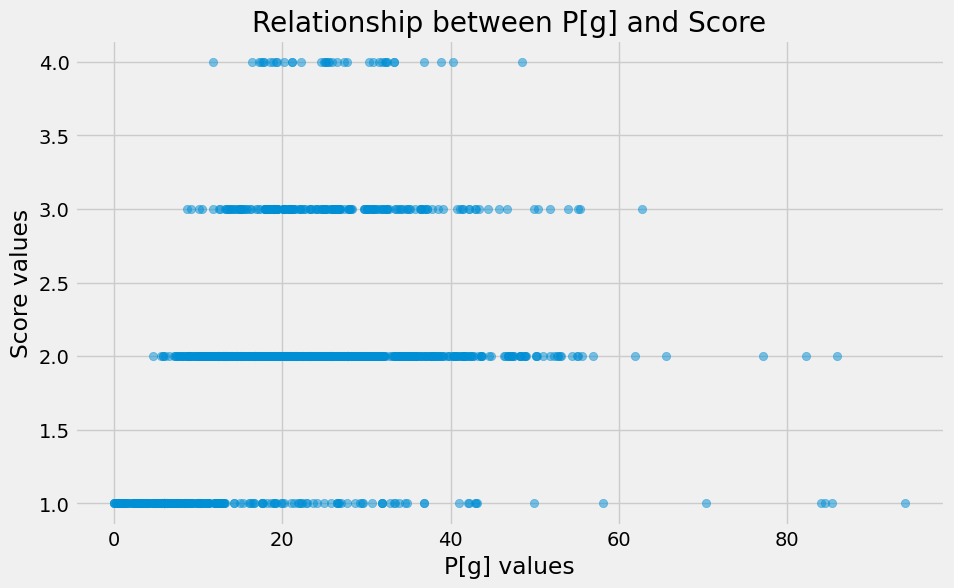

In [ ]:
# Scatter plot with Score and 'P[g]'
plt.figure(figsize=(10, 6))  # Set the figure size for clarity
plt.scatter(pp_features['P[g]'], pp_features['Score(1:worst 2:bad 3:good 4:best)'], alpha=0.5)
plt.title('Relationship between P[g] and Score')
plt.xlabel('P[g] values')
plt.ylabel('Score values')
plt.grid(True)
plt.show()

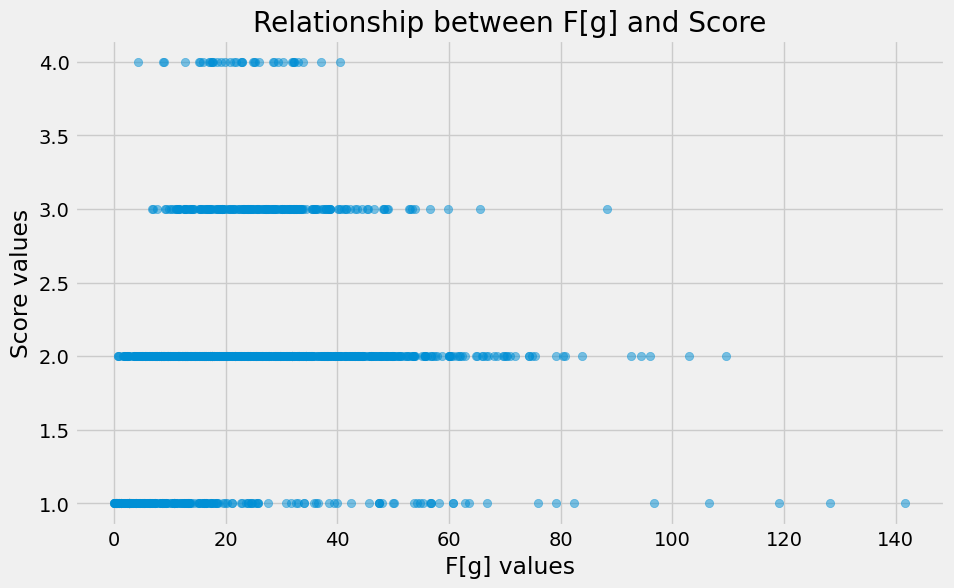

In [ ]:
# Scatter plot with Score and 'F[g]'
plt.figure(figsize=(10, 6))  # Set the figure size for clarity
plt.scatter(pp_features['F[g]'], pp_features['Score(1:worst 2:bad 3:good 4:best)'], alpha=0.5)
plt.title('Relationship between F[g] and Score')
plt.xlabel('F[g] values')
plt.ylabel('Score values')
plt.grid(True)
plt.show()

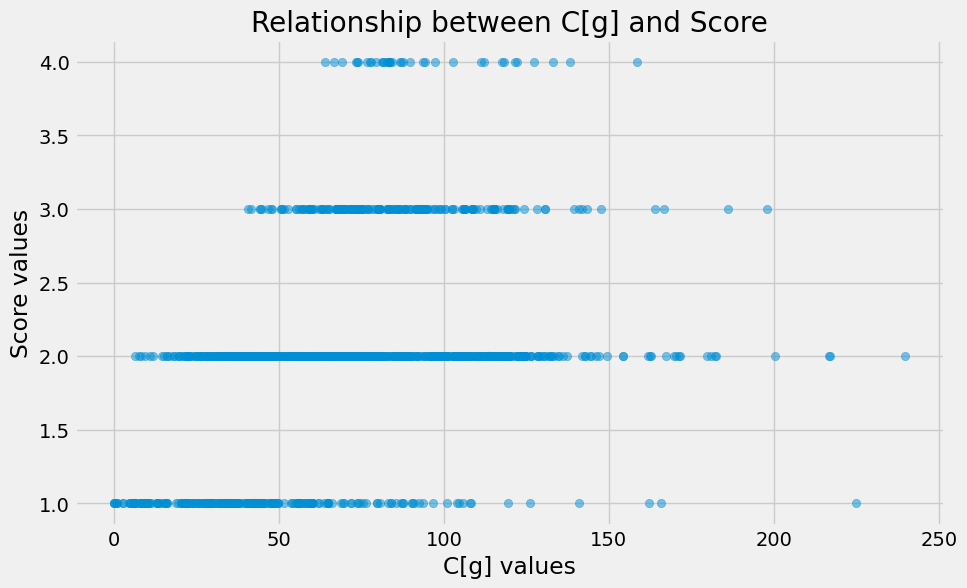

In [ ]:
# Scatter plot with Score and 'C[g]'
plt.figure(figsize=(10, 6))  # Set the figure size for clarity
plt.scatter(pp_features['C[g]'], pp_features['Score(1:worst 2:bad 3:good 4:best)'], alpha=0.5)
plt.title('Relationship between C[g] and Score')
plt.xlabel('C[g] values')
plt.ylabel('Score values')
plt.grid(True)
plt.show()